## Asymptotic Bode diagrams

One of the big advantages of Bode diagrams is that they are very easy to sketch out by hand (or, equivalently, to visualise mentally).

In [1]:
import numpy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
omega = numpy.logspace(-2, 2, 1000)
s = 1j*omega

## Systems with real poles

Let's study the bode diagrams of systems of the form

$$\frac{K}{(\tau s + 1)^n}$$

In [3]:
def plotresponse(order=1, tau=1, K=1):
    G = K/(tau*s + 1)**order
    high_freq_asymptote = K/(tau*omega)**order
    
    # Gain part
    plt.subplot(2, 1, 1)
    plt.loglog(omega, numpy.abs(G))
    plt.axhline(K, color='grey')  # Rule 1
    plt.loglog(omega, high_freq_asymptote, color='grey') # Rule 2
    plt.axvline(1/tau, color='grey')  # Rule 2
    plt.ylim([1e-2, 1e+1])
    plt.ylabel('|G|')

    # Phase part
    plt.subplot(2, 1, 2)
    plt.semilogx(omega, numpy.unwrap(numpy.angle(G)))  # Rule 3
    plt.axhline(-numpy.pi/2*order, color='grey')  # Rule 4
    plt.axvline(1/tau, color='grey')  # Rule 5
    plt.ylim([-3*numpy.pi/2, numpy.pi/2])
    plt.ylabel(r'$\angle G$')

In [4]:
numpy.arctan2(-1, -1)

-2.356194490192345

In [5]:
from ipywidgets import interact

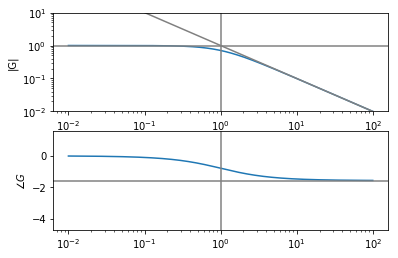

In [6]:
interact(plotresponse, order=(-2, 3), tau=(0.1, 10), K=(-1., 2));

We see that we can construct a reasonable approximation by knowing a couple of things

1. The gain ($K$) of the system defines the low frequency asymptote of the gain graph
2. The high frequency asymptote of the gain is $\frac{K}{(\omega\tau)^n}$. Effectively, on a loglog scale, this means we have -n/decade slope above frequencies of around $1/\tau$
3. The low frequency phase asymptote is 0
4. The high frequency phase asymptote is $-n\pi/2$
5. The phase curve has an inflection at $1/\tau$

## Systems with complex poles
Systems with complex poles show uniique frequency response behaviour. We will focus on the second order system shown below:

$$ G = \frac{K}{\tau^2 s^2  + 2\tau\zeta s + 1}$$

In [7]:
def plotresponse(K=1, tau=1, zeta=1):
    plt.figure(figsize=(15, 5))
    order = 2
    G = K/(tau**2*s**2 + 2*tau*zeta*s + 1)
    high_freq_asymptote = K/(tau*omega)**order
    
    # Gain part
    plt.subplot(2, 2, 1)
    plt.loglog(omega, numpy.abs(G))
    plt.axhline(K, color='grey')  # Rule 1
    plt.loglog(omega, high_freq_asymptote, color='grey') # Rule 2
    plt.axvline(1/tau, color='grey')  # Rule 2
    if zeta <= 0.7:
        plt.axvline(numpy.sqrt(1 - 2*zeta**2)/tau, color='blue', alpha=0.4)
    plt.ylim([1e-2, 1e+1])
    plt.ylabel('|G|')

    # Phase part
    plt.subplot(2, 2, 3)
    plt.semilogx(omega, numpy.unwrap(numpy.angle(G)))  # Rule 3
    plt.axhline(-numpy.pi/2*order, color='grey')  # Rule 4
    plt.axvline(1/tau, color='grey')  # Rule 5
    plt.ylim([-3*numpy.pi/2, numpy.pi/2])
    plt.ylabel(r'$\angle G$')
    
    # poles
    plt.subplot(1, 2, 2)
    poles = numpy.roots([tau**2, 2*tau*zeta, 1])
    plt.scatter(poles.real, poles.imag)
    plt.axhline(0)
    plt.axvline(0)
    plt.axis([-2, 2, -2, 2])
    plt.show()

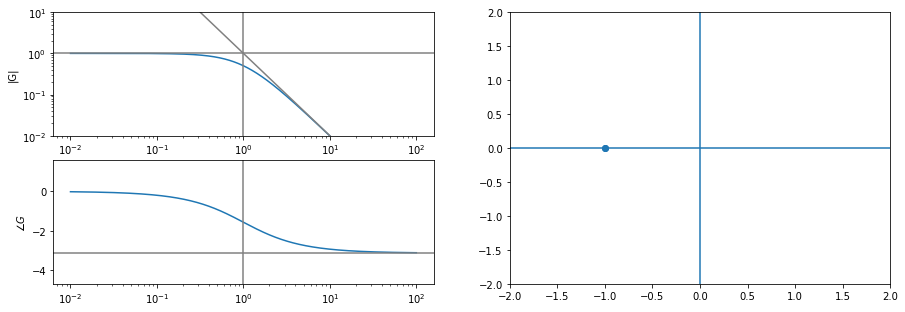

<function __main__.plotresponse>

In [8]:
interact(plotresponse, K=(0.1, 2), tau=(0.1, 2), zeta=(0., 1.1))

We see that the rules from before still hold, except that we start seeing the so-called "harmonic nose" emerge when $\zeta<\sqrt{2}/2\approx{0.7}$. The maximum of the nose occurs at the resonant frequency of

$$\omega_r = \frac{\sqrt{1 - 2\zeta^2}}{\tau}$$

## Dead time

The effect of dead time is to increase the phase lag indefinitely as a function of frequency. Delay has no effect on the gain of a system.

In [9]:
D = 1
G = numpy.exp(-D*s)

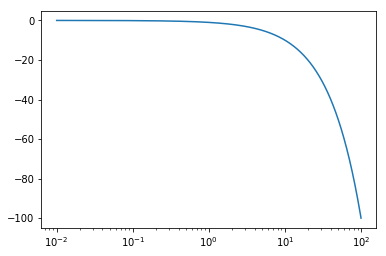

In [10]:
plt.semilogx(omega, numpy.unwrap(numpy.angle(G)))